# Springboard Data Science Career
# Which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?

## Context 

A borough is just a fancy word for district. You may be familiar with the five boroughs of New York… well, there are 32 boroughs within Greater London [(here's some info for the curious)](https://en.wikipedia.org/wiki/London_boroughs). 

Some of them are more desirable areas to live in, and the data will reflect that with a greater rise in housing prices.

## The Data Science Pipeline

This is Tier Three, so we'll get you started. 

Data Science is magical. In this case study, you'll get to apply some complex machine learning algorithms. But as  [David Spiegelhalter](https://www.youtube.com/watch?v=oUs1uvsz0Ok) reminds us, there is no substitute for simply **taking a really, really good look at the data.** Sometimes, this is all we need to answer our question.

Data Science projects generally adhere to the four stages of Data Science Pipeline:
1. Sourcing and loading 
2. Cleaning, transforming, and visualizing 
3. Modeling 
4. Evaluating and concluding 


### 1. Sourcing and Loading 

Any Data Science project kicks off by importing  ***pandas***. The documentation of this wonderful library can be found [here](https://pandas.pydata.org/). As you've seen, pandas is conveniently connected to the [Numpy](http://www.numpy.org/) and [Matplotlib](https://matplotlib.org/) libraries. 

***Hint:*** This part of the data science pipeline will test those skills you acquired in the pandas Foundations course, Module One. 

#### 1.1. Importing Libraries

In [1]:
# Let's import the pandas, numpy libraries as pd, and np respectively. 
import pandas as pd
import numpy as np

# Load the pyplot collection of functions from matplotlib, as plt 
import matplotlib.pyplot as plt

#### 1.2.  Loading the data
Your data comes from the [London Datastore](https://data.london.gov.uk/): a free, open-source data-sharing portal for London-oriented datasets. 

In [2]:
# First, make a variable called url_LondonHousePrices, and assign it the following link, enclosed in quotation-marks as a string:
# https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls

url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

# The dataset we're interested in contains the Average prices of the houses, and is actually on a particular sheet of the Excel file. 
# As a result, we need to specify the sheet name in the read_excel() method.
# Put this data into a variable called properties.  
properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)

### 2. Cleaning, transforming, and visualizing
This second stage is arguably the most important part of any Data Science project. The first thing to do is take a proper look at the data. Cleaning forms the majority of this stage, and can be done both before or after Transformation.

The end goal of data cleaning is to have tidy data. When data is tidy: 

1. Each variable has a column.
2. Each observation forms a row.

Keep the end goal in mind as you move through this process, every step will take you closer. 



***Hint:*** This part of the data science pipeline should test those skills you acquired in: 
- Intermediate Python for data science, all modules.
- pandas Foundations, all modules. 
- Manipulating DataFrames with pandas, all modules.
- Data Types for Data Science, Module Four.
- Python Data Science Toolbox - Part One, all modules

**2.1. Exploring your data** 

Think about your pandas functions for checking out a dataframe. 

In [3]:
properties.head()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,91449,50460.2,93284.5,64958.1,71306.6,81671.5,120933,69158.2,79885.9,...,43958.5,44803.4,45544.5,48527.5,56701.6,74435.8,64018.9,54705.2,NaN,53202.8
2,1995-02-01,82202.8,51085.8,93190.2,64787.9,72022.3,81657.6,119509,68951.1,80897.1,...,43925.4,44528.8,46051.6,49341.3,56593.6,72777.9,63715,54356.1,NaN,53096.2
3,1995-03-01,79120.7,51269,92247.5,64367.5,72015.8,81449.3,120282,68712.4,81379.9,...,44434.9,45200.5,45383.8,49442.2,56171.2,73896.8,64113.6,53583.1,NaN,53201.3
4,1995-04-01,77101.2,53133.5,90762.9,64277.7,72965.6,81124.4,120098,68610,82188.9,...,44267.8,45614.3,46124.2,49455.9,56567.9,74455.3,64623.2,54786,NaN,53590.9


In [4]:
properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            305 non-null    datetime64[ns]
 1   City of London        306 non-null    object        
 2   Barking & Dagenham    306 non-null    object        
 3   Barnet                306 non-null    object        
 4   Bexley                306 non-null    object        
 5   Brent                 306 non-null    object        
 6   Bromley               306 non-null    object        
 7   Camden                306 non-null    object        
 8   Croydon               306 non-null    object        
 9   Ealing                306 non-null    object        
 10  Enfield               306 non-null    object        
 11  Greenwich             306 non-null    object        
 12  Hackney               306 non-null    object        
 13  Hammersmith & Fulham

In [5]:
properties.shape

(306, 49)

**2.2. Cleaning the data**

You might find you need to transpose your dataframe, check out what its row indexes are, and reset the index. You  also might find you need to assign the values of the first row to your column headings  . (Hint: recall the .columns feature of DataFrames, as well as the iloc[] method).

Don't be afraid to use StackOverflow for help  with this.

In [6]:
# Transpose Data
properties_T = properties.transpose()

In [7]:
#Check Index
properties_T.index

Index(['Unnamed: 0', 'City of London', 'Barking & Dagenham', 'Barnet',
       'Bexley', 'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey', 'Harrow',
       'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham',
       'Merton', 'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark',
       'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth',
       'Westminster', 'Unnamed: 34', 'Inner London', 'Outer London',
       'Unnamed: 37', 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER',
       'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON',
       'SOUTH EAST', 'SOUTH WEST', 'Unnamed: 47', 'England'],
      dtype='object')

In [8]:
# Reset Indexes
properties_T = properties_T.reset_index()

properties_T.index

RangeIndex(start=0, stop=49, step=1)

In [9]:
# Column Names
properties_T.columns = properties_T.iloc[0]
properties_T.drop(0, inplace=True)

In [10]:
# Check DataFrame
properties_T.head()

,Unnamed: 0,NaN,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00
1,City of London,E09000001,91449,82202.8,79120.7,77101.2,84409.1,94900.5,110128,112329,...,813770,810455,826227,776894,737275,747611,777640,844989,867841,899831
2,Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,...,299421,304778,304579,306390,301283,303653,304265,304099,283139,295744
3,Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,...,528577,526670,525678,522639,519306,518542,519121,527747,526553,532503
4,Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,...,337523,333340,332920,333657,336302,334765,337760,339215,346840,339408
5,Brent,E09000005,71306.6,72022.3,72015.8,72965.6,73704,74310.5,74127,73547,...,488784,501533,494770,432188,427126,423161,467145,461398,494455,466574


**2.3. Cleaning the data (part 2)**

You might we have to **rename** a couple columns. How do you do this? The clue's pretty bold...

In [11]:
# Rename Columns
properties_T.rename(columns={'Unnamed: 0':'London_Borough', pd.NaT:'Borough_Code'}, inplace=True)

In [12]:
# Check properties_T
properties_T.head()

,London_Borough,Borough_Code,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00
1,City of London,E09000001,91449,82202.8,79120.7,77101.2,84409.1,94900.5,110128,112329,...,813770,810455,826227,776894,737275,747611,777640,844989,867841,899831
2,Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,...,299421,304778,304579,306390,301283,303653,304265,304099,283139,295744
3,Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,...,528577,526670,525678,522639,519306,518542,519121,527747,526553,532503
4,Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,...,337523,333340,332920,333657,336302,334765,337760,339215,346840,339408
5,Brent,E09000005,71306.6,72022.3,72015.8,72965.6,73704,74310.5,74127,73547,...,488784,501533,494770,432188,427126,423161,467145,461398,494455,466574


**2.4.Transforming the data**

Remember what Wes McKinney said about tidy data? 

You might need to **melt** your DataFrame here. 

In [13]:
properties_melt = pd.melt(properties_T, id_vars=['London_Borough','Borough_Code'], var_name='Date', value_name='Average prices')

Remember to make sure your column data types are all correct. Average prices, for example, should be floating point numbers... 

In [14]:
# info
properties_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   London_Borough  14640 non-null  object        
 1   Borough_Code    13725 non-null  object        
 2   Date            14640 non-null  datetime64[ns]
 3   Average prices  13725 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 457.6+ KB


In [15]:
# numeric in prices
properties_melt['Average prices'] = pd.to_numeric(properties_melt['Average prices']) 

In [16]:
# properties_melt
properties_melt.info()    # properties_melt.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   London_Borough  14640 non-null  object        
 1   Borough_Code    13725 non-null  object        
 2   Date            14640 non-null  datetime64[ns]
 3   Average prices  13725 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 457.6+ KB


**2.5. Cleaning the data (part 3)**

Do we have an equal number of observations in the ID, Average Price, Month, and London Borough columns? Remember that there are only 32 London Boroughs. How many entries do you have in that column? 

Check out the contents of the London Borough column, and if you find null values, get rid of them however you see fit. 

In [17]:
# 32 London Borough - Save the rows that will be drop
not_LondonBorough = properties_melt[properties_melt['Borough_Code'].isna()]
not_LondonBorough['London_Borough'].unique()

array(['Unnamed: 34', 'Unnamed: 37', 'Unnamed: 47'], dtype=object)

In [18]:
# Final DF without Null Values 
final_properties = properties_melt.dropna()

In [19]:
#Verify Data - Type of Data
final_properties.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13725 entries, 0 to 14639
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   London_Borough  13725 non-null  object        
 1   Borough_Code    13725 non-null  object        
 2   Date            13725 non-null  datetime64[ns]
 3   Average prices  13725 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 536.1+ KB


In [20]:
# data without null values
final_properties['London_Borough'].unique()

array(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster', 'Inner London',
       'Outer London', 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER',
       'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON',
       'SOUTH EAST', 'SOUTH WEST', 'England'], dtype=object)

In [21]:
final_properties.head(48)

,London_Borough,Borough_Code,Date,Average prices
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.22660
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698
5,Bromley,E09000006,1995-01-01,81671.47692
6,Camden,E09000007,1995-01-01,120932.88810
7,Croydon,E09000008,1995-01-01,69158.16225
8,Ealing,E09000009,1995-01-01,79885.89069
9,Enfield,E09000010,1995-01-01,72514.69096


In [22]:
# Create and drop non London Boroughs
nonBoroughs = ['Barking & Dagenham', 'Barnet', 'Bexley',
               'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
               'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey',
               'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
               'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth',
               'Lewisham', 'Merton', 'Newham', 'Redbridge',
               'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
               'Waltham Forest', 'Wandsworth', 'Westminster']

# drop non London Boroughs - 'City of London' is also a Non Borough, read Wikipedia
final_properties = final_properties[final_properties['London_Borough'].isin(nonBoroughs)]

final_properties['London_Borough'].unique()

array(['Barking & Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney',
       'Hammersmith & Fulham', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Kensington & Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham',
       'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'],
      dtype=object)

**2.6. Visualizing the data**

To visualize the data, why not subset on a particular London Borough? Maybe do a line plot of Month against Average Price?

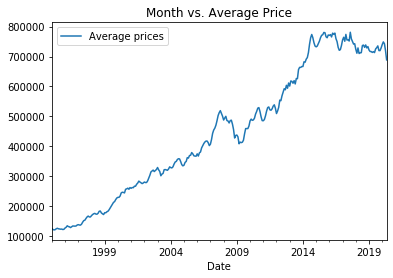

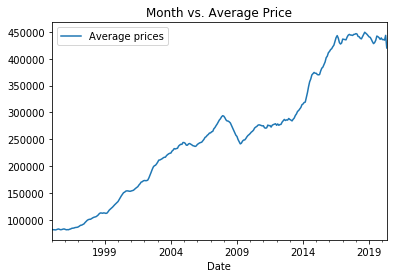

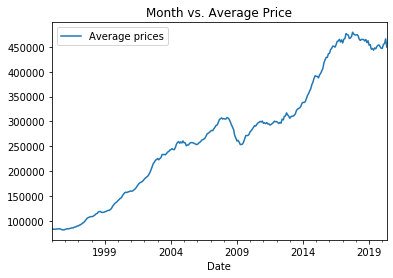

In [23]:
# Plot the PDF
ax = final_properties[final_properties['London_Borough'] == 'Hammersmith & Fulham'].plot(x='Date', y='Average prices')
ax1 = final_properties[final_properties['London_Borough'] == 'Bromley'].plot(x='Date', y='Average prices')
ax2 = final_properties[final_properties['London_Borough'] == 'Harrow'].plot(x='Date', y='Average prices')

ax.set_title('Month vs. Average Price')
ax1.set_title('Month vs. Average Price')
ax2.set_title('Month vs. Average Price')

plt.show();

To limit the number of data points you have, you might want to extract the year from every month value your *Month* column. 

To this end, you *could* apply a ***lambda function***. Your logic could work as follows:
1. look through the `Month` column
2. extract the year from each individual value in that column 
3. store that corresponding year as separate column. 

Whether you go ahead with this is up to you. Just so long as you answer our initial brief: which boroughs of London have seen the greatest house price increase, on average, over the past two decades? 

In [24]:
# Add year as column
final_properties['Year'] = final_properties['Date'].apply(lambda x: x.year)

In [25]:
# check year in final_properties
final_properties.head()

,London_Borough,Borough_Code,Date,Average prices,Year
1,Barking & Dagenham,E09000002,1995-01-01,50460.22660,1995
2,Barnet,E09000003,1995-01-01,93284.51832,1995
3,Bexley,E09000004,1995-01-01,64958.09036,1995
4,Brent,E09000005,1995-01-01,71306.56698,1995
5,Bromley,E09000006,1995-01-01,81671.47692,1995


In [26]:
final_properties.count()

London_Borough    9760
Borough_Code      9760
Date              9760
Average prices    9760
Year              9760
dtype: int64

In [27]:
# statistics (With Help - Tier 2)

df = final_properties

dfg = df.groupby(by=['London_Borough', 'Year']).mean()
dfg.sample(10)

,,Average prices
London_Borough,Year,
Hackney,2011,3.086984e+05
Hammersmith & Fulham,2009,4.354564e+05
Newham,2000,9.288733e+04
Kingston upon Thames,2011,3.120739e+05
Redbridge,1995,7.258049e+04
Kensington & Chelsea,2016,1.276235e+06
Lambeth,1995,6.810569e+04
Waltham Forest,2011,2.209054e+05
Islington,2000,1.926341e+05


In [28]:
# Tier 2

dfg = dfg.reset_index()
dfg.head()

,London_Borough,Year,Average prices
0,Barking & Dagenham,1995,51817.969390
1,Barking & Dagenham,1996,51718.192690
2,Barking & Dagenham,1997,55974.262309
3,Barking & Dagenham,1998,60285.821083
4,Barking & Dagenham,1999,65320.934441


**3. Modeling**

Function that will calculate a ratio of house prices, comparing the price of a house in 2019 to the price in 1999.


In [29]:
# def create_price_ratio(d):
#     price_1999 = float(d['Average prices'][d['Year']==1999]) #.groupby(by=['London_Borough', 'Year']).mean()
#     price_2019 = float(d['Average prices'][d['Year']==2019]) #.groupby(by=['London_Borough', 'Year']).mean()
#     ratio = [price_1999/price_2019]     
#     return ratio

# Here's where you should write your function:
def create_price_ratio(d):
    y1999 = float(d['Average prices'][d['Year']==1999])
    y2019 = float(d['Average prices'][d['Year']==2019])
    ratio = [y1999/y2019]
    return ratio

create_price_ratio(dfg[dfg['London_Borough']=='Camden'])


[0.22701749807852833]

In [30]:
final = {} #From Tier 2

# Now let's declare a for loop that will iterate through each of the unique elements of the 'London_Borough' column of our DataFrame dfg.
# Call the iterator variable 'b'. 
for b in dfg['London_Borough'].unique():
    # Let's make our parameter to our create_price_ratio function: i.e., we subset dfg on 'London_Borough' == b. 
    borough = dfg[dfg['London_Borough'] == b]
    # Make a new entry in the final dictionary whose value's the result of calling create_price_ratio with the argument: borough
    final[b] = create_price_ratio(borough)

# We use the function and incorporate that into a new key of the dictionary 
print(final) 

{'Barking & Dagenham': [0.21874251533237668], 'Barnet': [0.2617428084614105], 'Bexley': [0.2576091877975756], 'Brent': [0.23636328274085405], 'Bromley': [0.27694228833785123], 'Camden': [0.22701749807852833], 'Croydon': [0.2659069570751742], 'Ealing': [0.2670222150490421], 'Enfield': [0.2596176001394799], 'Greenwich': [0.2312080968362837], 'Hackney': [0.18992534868986238], 'Hammersmith & Fulham': [0.2756930452088401], 'Haringey': [0.21944186633779264], 'Harrow': [0.28199080020722006], 'Havering': [0.25464650366975555], 'Hillingdon': [0.26925958786825277], 'Hounslow': [0.2795510710624963], 'Islington': [0.24517375505093267], 'Kensington & Chelsea': [0.25042199843435686], 'Kingston upon Thames': [0.26621151569413704], 'Lambeth': [0.22937068245074527], 'Lewisham': [0.20695746906766382], 'Merton': [0.2408199212766178], 'Newham': [0.2047646719512479], 'Redbridge': [0.24951257681130828], 'Richmond upon Thames': [0.2796378774989474], 'Southwark': [0.22086756388730389], 'Sutton': [0.2712465857

In [31]:
# df for Dictionary
ratio = pd.DataFrame(final)
ratio.head()

,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,Greenwich,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
0,0.218743,0.261743,0.257609,0.236363,0.276942,0.227017,0.265907,0.267022,0.259618,0.231208,...,0.24082,0.204765,0.249513,0.279638,0.220868,0.271247,0.2578,0.194707,0.246919,0.224046


## Plot the Results

In [32]:
#Transpose the results
ratio_T = ratio.T

In [33]:
# Check Info
ratio_T.head()
ratio_T.columns

RangeIndex(start=0, stop=1, step=1)

In [34]:
# Change Title ratio
ratio_T.rename(columns={0: '1999-2019'}, inplace=True)

ratio_T.head()

,1999-2019
Barking & Dagenham,0.218743
Barnet,0.261743
Bexley,0.257609
Brent,0.236363
Bromley,0.276942


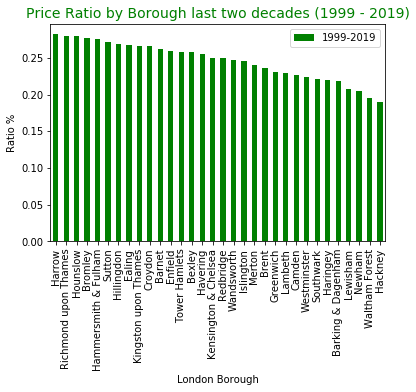

In [35]:
# Sort Ratio Values, Self Explanatory in Graph

ratio_T.sort_values('1999-2019', ascending=False, inplace=True)
ratio_T.plot(kind='bar', color='g')

plt.title('Price Ratio by Borough last two decades (1999 - 2019)', fontsize = 14, color='green')
plt.xlabel('London Borough')
plt.ylabel('Ratio %')

plt.show();

### 4. Conclusion
What can you conclude? Type out your conclusion below. 

Look back at your notebook. Think about how you might summarize what you have done, and prepare a quick presentation on it to your mentor at your next meeting. 

We hope you enjoyed this practical project. It should have consolidated your data hygiene and pandas skills by looking at a real-world problem involving just the kind of dataset you might encounter as a budding data scientist. Congratulations, and looking forward to seeing you at the next step in the course! 

### 1. The first 10 boroughs with more variation (1998 - 2018) were:

In [36]:
ratio_T['1999-2019'].head(10)

Harrow                  0.281991
Richmond upon Thames    0.279638
Hounslow                0.279551
Bromley                 0.276942
Hammersmith & Fulham    0.275693
Sutton                  0.271247
Hillingdon              0.269260
Ealing                  0.267022
Kingston upon Thames    0.266212
Croydon                 0.265907
Name: 1999-2019, dtype: float64

### 2. The last 10 boroughs with more variation (1998 - 2018) were:

In [37]:
ratio_T['1999-2019'].tail(10)

Lambeth               0.229371
Camden                0.227017
Westminster           0.224046
Southwark             0.220868
Haringey              0.219442
Barking & Dagenham    0.218743
Lewisham              0.206957
Newham                0.204765
Waltham Forest        0.194707
Hackney               0.189925
Name: 1999-2019, dtype: float64

### 3. The max, min and percentaje ratio difference from the London Boroughs were:

In [38]:
min = ratio_T['1999-2019'].tail(1)
max = ratio_T['1999-2019'].head(1)
dif = max[0] - min[0]

print('The minimum % change from in 2 decades (1999 - 2019) was {:.1%}'.format(min[0])) 
print('The maximum % change from in 2 decades (1999 - 2019) was {:.1%}'.format(max[0]))
print('The difference from the 32 boroughs in 2 decades (1999 - 2019) was {:.1%}'.format(dif))

The minimum % change from in 2 decades (1999 - 2019) was 19.0%
The maximum % change from in 2 decades (1999 - 2019) was 28.2%
The difference from the 32 boroughs in 2 decades (1999 - 2019) was 9.2%


## Change in 2 decades for top 5 London Boroughs

In [39]:
# First 5 London Boroughs
top5_borough = ratio_T['1999-2019'].head(5)

# Function Min Max Year:
def create_mean(d):
    mean1999 = float(d['Average prices'][d['Year']==1999].min())
    mean2019 = float(d['Average prices'][d['Year']==2019].max())
    return (mean1999, mean2019)


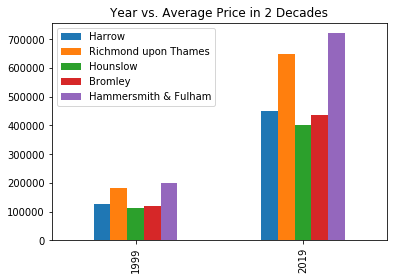

In [40]:
compare = {} 

# Function - Mean 199 vs 2019 
for b in top5_borough.index:
    borough = dfg[dfg['London_Borough'] == b]
    # Make a new entry for the mean
    compare[b] = create_mean(borough)

# Create DataFrame
res_borough = pd.DataFrame(compare, index=['1999','2019'])

# Plot by year
res_borough.plot(kind='bar', title='Year vs. Average Price in 2 Decades');


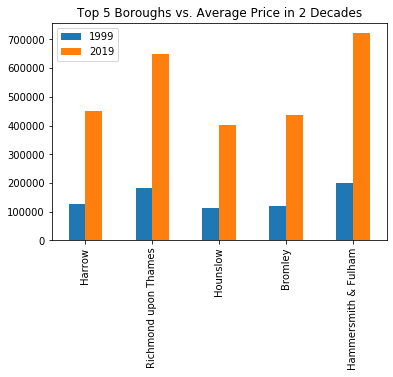

In [41]:
res_borough.T.plot(kind='bar', title='Top 5 Boroughs vs. Average Price in 2 Decades')
plt.show();

### Notes

a. I take the 1999 - 2019 data
b. Index
c. Names of Borough - City of London
d. Something else?
